In [5]:
#Importing neccessity libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Loading dataset
dataset=pd.read_csv('train.csv')
dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


.Their are total 15957 data and  8 features.                                    
.Their is no label in this dataset .so, This dataset belongs to Unsupervise learning . so, we use kmeans clustering to create the model.                         
.'id' and 'comment_text' are nominal data .so, we can drop them to get better model.         

In [7]:
#Droping 'id' and 'comment_text'
x=dataset.iloc[ : ,2: ]
x.tail()

,malignant,highly_malignant,rude,threat,abuse,loathe
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0
159570,0,0,0,0,0,0


In [8]:
#Checking NAN value
dataset.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

.Their is no missing value present in this dataset. so, we can proceed further. 

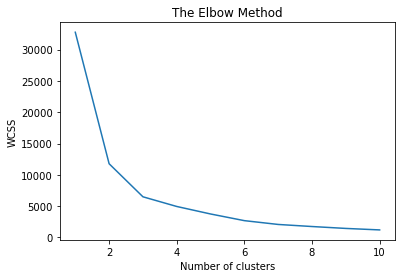

In [9]:
#Using Elbow method to get the value of k
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
x.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


.Value of n_cluster=3 .we got through Elbow method.

In [11]:
#Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=40)
y_means=kmeans.fit_predict(x)
print(y_means)

[0 0 0 ... 0 0 0]


In [19]:
#Predicting the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[1,0,0,0,0,1]]))
test[0]

2

In [20]:
#Saving the model to the local file system
import pickle
filename='finalized_model.pickle'
pickle.dump(kmeans,open(filename,'wb'))

In [24]:
#Looking at the points which belong to cluster
x[y_means==1]

,malignant,highly_malignant,rude,threat,abuse,loathe
6,1,1,1,0,1,0
42,1,0,1,0,1,1
43,1,0,1,0,1,0
55,1,1,1,0,1,0
56,1,0,1,0,1,0
...,...,...,...,...,...,...
159494,1,0,1,0,1,1
159514,1,0,0,0,1,0
159541,1,0,1,0,1,0
159546,1,0,0,0,1,0
